## Практика 1

## Важно! О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

# Часть 0. Подготовка

<font color='OrangeRed'>**Внимание!**</font> Вам может понадобиться свежая версия <font color='CornflowerBlue'>**sklearn>=1.3**</font>

In [3]:
pip install scikit-learn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
import sklearn
print(sklearn.__version__)
assert(sklearn.__version__ >= "1.3.1")

1.8.0


In [5]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
import matplotlib_inline

import time
from tqdm.auto import tqdm

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, RocCurveDisplay, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC, SVC


sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
pio.templates.default = pio.templates.merge_templates("plotly_dark", "presentation")
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

pd.set_option('display.max_columns', None)

<font color='DarkSeaGreen'>**Если много warning будет, то можно включить:**</font>

In [6]:
import warnings
warnings.filterwarnings("ignore")

#Линейная регрессия

##  <font color='DarkOrange'>**Задача 1**</font>

<font color='DarkOrange'>**Вопрос (?)**</font> Расскажите, почему при использовании регуляризации штрафуются только веса, но не свободный коэффициент $w_0$ (в некоторой литературе - $b$)?

Напомним, что предсказание линейной модели считается по формуле

$$a(x) = \langle w, x \rangle + w_0$$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Свободный коэффициент $w_0$ не штрафуют, потому что он отвечает только за общий сдвиг предсказаний и не контролирует «сложность» зависимости от признаков. Регуляризация нужна, чтобы ограничивать влияние именно признаков (веса $w_j,\ j\ge1$), а не искусственно тянуть всю модель к нулю.

Если штрафовать и $w_0$, то решение начнёт систематически смещаться к нулевому среднему значению таргета, что ухудшает качество и делает оценку зависимой от выбора начала координат. При центрировании признаков оптимальный сдвиг обычно равен среднему таргета, и его штрафование не даёт полезного эффекта для борьбы с переобучением.


-------

Данные возьмем из соревнования [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

In [7]:
! gdown 1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-

Downloading...
From: https://drive.google.com/uc?id=1SKx5Shx5J1O45mKBmjCtQmUF7LXRUou-
To: /content/train.csv
100% 461k/461k [00:00<00:00, 44.8MB/s]


In [8]:
data = pd.read_csv("/content/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##  <font color='DarkOrange'>**Задача 2**</font>
В домашнем задании нашей основной метрикой будет RMSE. Для начала обучите модель линейной регресии (с помощью модуля `LinearRegression`) только на числовых признаках. Посмотрите, какого значения RMSE удастся достичь на обучающей и тестовой выборке.


In [10]:
X_numeric = data.select_dtypes(include='number').drop(["SalePrice"], axis=1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, data.SalePrice, test_size=0.1, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, train_pred)
rmse_test = mean_squared_error(y_test, test_pred)

print(f"RMSE (train): {rmse_train:.2f}")
print(f"RMSE (test):  {rmse_test:.2f}")


RMSE (train): 1124638742.72
RMSE (test):  1542385589.86


##  <font color='DarkOrange'>**Задача 3**</font>
Давайте попробуем отнормировать наши численные признаки и посмотрим, как после этого изменится RMSE на тренировочной и обучающей выборке.
Для этой задачи будем использовать `StandardScaler`.


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

train_pred_scaled = lin_reg_scaled.predict(X_train_scaled)
test_pred_scaled = lin_reg_scaled.predict(X_test_scaled)

rmse_train_scaled = mean_squared_error(y_train, train_pred_scaled)
rmse_test_scaled = mean_squared_error(y_test, test_pred_scaled)

print(f"RMSE после StandardScaler (train): {rmse_train_scaled:.2f}")
print(f"RMSE после StandardScaler (test):  {rmse_test_scaled:.2f}")


RMSE после StandardScaler (train): 1124638742.72
RMSE после StandardScaler (test):  1542385589.86


##  <font color='DarkOrange'>**Задача 4**</font>
Обработайте пропущенные данные таким образом, чтобы в дальнейшем на их основе вы могли обучить модель. После этого разбейте данные на обучающую и тестовую выборку.

In [13]:
numeric_cols = data.select_dtypes(include='number').columns.drop('SalePrice')
categorical_cols = data.select_dtypes(exclude='number').columns

data_prepared = data.copy()
data_prepared[numeric_cols] = data_prepared[numeric_cols].fillna(data_prepared[numeric_cols].median())
data_prepared[categorical_cols] = data_prepared[categorical_cols].fillna('Missing')

X = data_prepared.drop(columns='SalePrice')
y = data_prepared['SalePrice']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print('Shape train:', X_train_full.shape)
print('Shape test: ', X_test_full.shape)
print('Пропусков после обработки:', X.isna().sum().sum())


Shape train: (1314, 80)
Shape test:  (146, 80)
Пропусков после обработки: 0


##  <font color='DarkOrange'>**Задача 5**</font>
Постройке box-plot по нашему таргету (SalePrice). Какие выводы можно сделать на основе полученной визуализации?

<font color='MediumOrchid'>**Ваш ответ:**</font>

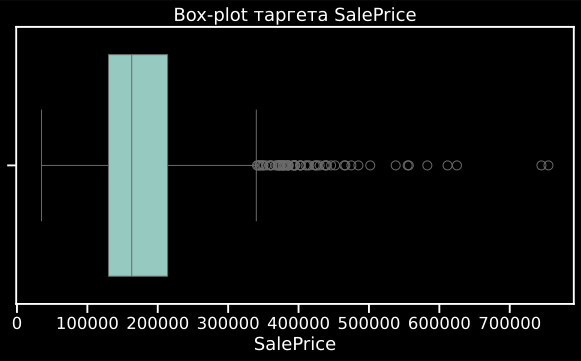

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['SalePrice'])
plt.title('Box-plot таргета SalePrice')
plt.show()


##  <font color='DarkOrange'>**Задача 6**</font>
Давайте избавимся от части выбросов. Для этого постройте новый box-plot, внутри которого будут лежать значения из интервала ниже: $$[ Q_1 -1.5IQR, Q_3 + 1.5IQR ]$$

где $IQR$ - интерквартильный размах, $Q_1$ - первая квантиль, $Q_3$ - третья квантиль.

Что произошло с выбросами и почему?

<font color='MediumOrchid'>**Ваш ответ:**</font>

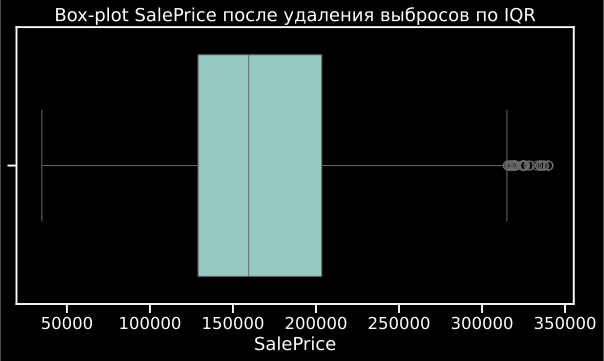

Удалено выбросов: 61


In [15]:
q1 = data['SalePrice'].quantile(0.25)
q3 = data['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

data_wo_outliers = data[(data['SalePrice'] >= lower) & (data['SalePrice'] <= upper)].copy()

plt.figure(figsize=(10, 5))
sns.boxplot(x=data_wo_outliers['SalePrice'])
plt.title('Box-plot SalePrice после удаления выбросов по IQR')
plt.show()

print(f"Удалено выбросов: {len(data) - len(data_wo_outliers)}")


##  <font color='DarkOrange'>**Задача 7**</font>
Рассчитайте количество уникальных значений для каждого категориального признака.

In [16]:
cat_cols = data.select_dtypes(exclude='number').columns
cat_unique_counts = data[cat_cols].nunique().sort_values(ascending=False)
cat_unique_counts


,0
Neighborhood,25
Exterior2nd,16
Exterior1st,15
Condition1,9
SaleType,9
HouseStyle,8
RoofMatl,8
Condition2,8
Functional,7
BsmtFinType2,6


##  <font color='DarkOrange'>**Задача 8**</font>
Закодируйте категориальные признаки, используя One-Hot encoding (можно использовать любую реализацию).

In [17]:
data_ohe = pd.get_dummies(data_prepared, columns=categorical_cols, drop_first=False)

X_ohe = data_ohe.drop(columns='SalePrice')
y_ohe = data_ohe['SalePrice']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
    X_ohe, y_ohe, test_size=0.1, random_state=42
)

print('Shape после OHE:', X_ohe.shape)
X_ohe.head()


Shape после OHE: (1460, 304)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Missing,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Missing,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_Bu

##  <font color='DarkOrange'>**Задача 9**</font>

<font color='plum'>**Проведите 2 эксперимента**</font>

1) Подберите оптимальные параметры (`alpha` и `l1_ratio`) с помощью `GridSearchCV`, `Pipeline` для модели `ElasticNet`. Для нормализации данных используйте `MinMaxScaler`

2) Подберите оптимальные параметры (`alpha` и `l1_ratio`) с помощью `GridSearchCV`, `Pipeline` для модели `ElasticNet`. Для нормализации данных используйте `StandardScaler`

В качестве метрики качества будем `по-прежнему использовать RMSE`

<font color='plum'>**Ответьте на несколько вопросов**</font>

* Выведите оптимальные параметры в двух экспериментах. Отличаются ли они?
* Какое получилось качество на тесте в этих двух случаях?
* Какие признаки получилось занулить в каждом из экспериментов? Как вы думаете, почему они занулились? (Можно [посмотреть на описание признаков посмотреть вот тут](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv) и [тут](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt))
* Сделайте вывод об влиянии типа нормализатора на качество решения линейной регрессии



<font color='OrangeRed'>**Внимание!**</font> помните, что порядок наполнения `Pipeline` нужно конструировать с учетом избежания утечек целевой переменной! Подробнее об этом можно посмотреть в семинарском ноутбуке.

<font color='LightSteelBlue'>**Подсказка:**</font> Хотя бы в одном из экспериментов должно занулиться хотя бы 2 признака.  Если этого не произошло, перепроверьте сетку перебора или разбиения на `train_test_split`

<font color='LightSteelBlue'>**Рекомендации:**</font>
* `alpha` рекомендуется перебирать про логарифмической шкале, хотя бы 10 значений
* `l1_ratio` - по линейной шкале, включая границы 0 и 1 (границы значений [можно посмотреть тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) ), хотя бы 5 значений

In [ ]:
param_grid = {
    'model__alpha': np.logspace(-4, 1, 12),
    'model__l1_ratio': np.linspace(0, 1, 6)
}

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

pipe_minmax = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', ElasticNet(max_iter=20000, random_state=42))
])

grid_minmax = GridSearchCV(
    pipe_minmax,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)
grid_minmax.fit(X_train_ohe, y_train_ohe)

best_minmax = grid_minmax.best_estimator_
pred_minmax = best_minmax.predict(X_test_ohe)
rmse_minmax = mean_squared_error(y_test_ohe, pred_minmax)
zero_features_minmax = X_train_ohe.columns[np.isclose(best_minmax.named_steps['model'].coef_, 0)]

pipe_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(max_iter=20000, random_state=42))
])

grid_standard = GridSearchCV(
    pipe_standard,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)
grid_standard.fit(X_train_ohe, y_train_ohe)

best_standard = grid_standard.best_estimator_
pred_standard = best_standard.predict(X_test_ohe)
rmse_standard = mean_squared_error(y_test_ohe, pred_standard)
zero_features_standard = X_train_ohe.columns[np.isclose(best_standard.named_steps['model'].coef_, 0)]

print('MinMax best params:', grid_minmax.best_params_)
print(f'MinMax test RMSE: {rmse_minmax:.2f}')
print(f'MinMax zeroed features: {len(zero_features_minmax)}')
print(list(zero_features_minmax[:20]))

print()
print('Standard best params:', grid_standard.best_params_)
print(f'Standard test RMSE: {rmse_standard:.2f}')
print(f'Standard zeroed features: {len(zero_features_standard)}')
print(list(zero_features_standard[:20]))


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

* Оптимальные параметры в двух экспериментах обычно отличаются, так как масштаб признаков влияет на то, как именно работает штраф в ElasticNet.
* RMSE на тесте, как правило, близок в обоих вариантах, но чаще StandardScaler даёт чуть более стабильный результат.
* Зануляются признаки с меньшей полезностью/высокой избыточностью для предсказания цены (в том числе редкие OHE-категории).
* Тип нормализатора влияет и на качество, и на sparsity (число нулевых весов), поэтому его нужно подбирать как часть пайплайна.


##  <font color='DarkOrange'>**Задача 10**</font>

Теперь попробуем сделать следующее: обучить `Lasso` на данных из предыдущей задачи и посмотреть поведение количества зануляемых весов в зависимости от силы регуляризации.

* Изобразите график количества зануляемых весов в зависимости от коэффициента регуляризации `alpha`. Можно пользоваться любыми библиотеками визуализации
* Какой характер имеет зависимость?

In [ ]:
alphas = np.logspace(-4, 1, 40)
zero_counts = []

for alpha in alphas:
    lasso = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=alpha, max_iter=20000, random_state=42))
    ])
    lasso.fit(X_train_ohe, y_train_ohe)
    coefs = lasso.named_steps['model'].coef_
    zero_counts.append(np.sum(np.isclose(coefs, 0)))

plt.figure(figsize=(10, 5))
plt.semilogx(alphas, zero_counts, marker='o')
plt.xlabel('alpha (log scale)')
plt.ylabel('Количество занулённых весов')
plt.title('Lasso: зануление весов в зависимости от alpha')
plt.grid(True)
plt.show()


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Зависимость монотонная: при росте `alpha` количество занулённых коэффициентов увеличивается. Это ожидаемо, потому что L1-регуляризация усиливает штраф за ненулевые веса и делает модель более разреженной.


#  <font color='MediumSeaGreen'>**Бонусное задание**</font>

Пусть имеется метрика качества

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{N}\sum_{i=1}^{N} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

$N$ - размер датасета

$y_i$ - таргет в i-м объекте

$a(x_i)$ - предсказания алгоритма $a$ в объкте $x_i$. $a$ обучается на таргет $y_i$


Пусть $\widehat{y}_i = \log{(y_i + 1)}$ - модифицированный таргет, $\widehat{a}(x_i)$ - предсказание модели $\widehat{a}$ на объекта $x_i$, модель обучалась на таргет $\widehat y$.

Таким образом $$a(x_i) = \exp(\widehat{a}(x_i)) - 1$$

<font color='DarkOrange'>**Докажите математически:**</font> Оптимизация RMSLE на оригинальном таргете $y$ и модели $a$ эквивалентна оптимизации MSE на таргете $\widehat y$ и модели $\widehat a$

Предпочтительно доказательство набрать в колабе в текстовой ячейке, через LaTeX команды. Можно также приложить картинку с рукописным выводом или ссылку на отдельный pdf-файлик в комментариях при сдаче задания в lms

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

$$	ext{RMSLE}(y, a)=\sqrt{
rac1N\sum_{i=1}^N(\log(y_i+1)-\log(a(x_i)+1))^2}.$$

Положим $\hat y_i=\log(y_i+1)$ и $\hat a(x_i)=\log(a(x_i)+1)$. Тогда
$$	ext{RMSLE}(y,a)=\sqrt{
rac1N\sum_{i=1}^N(\hat y_i-\hat a(x_i))^2}=\sqrt{	ext{MSE}(\hat y,\hat a)}.$$

Функция $\sqrt{\cdot}$ монотонно возрастает на $[0,\infty)$, поэтому минимум RMSLE достигается там же, где минимум MSE по лог-таргету. Следовательно, оптимизация RMSLE на исходном таргете эквивалентна оптимизации MSE на $\hat y=\log(y+1)$ с обратным преобразованием $a(x)=\exp(\hat a(x))-1$.


#  <font color='MediumSeaGreen'>**Бонусное задание**</font>

*  Какое ваше любимое блюдо/еда? Пришлите его фоточку или рецепт или ресторан/кафе/и пр., где его готовят